# 第四讲 NumPy基础: 数组和向量化计算

## 1. 初识NumPy

* NumPy（Numerical Python）是Python数值计算中最为重要的基础包。
* 大多数计算包都提供了基于NumPy的科学函数功能，将NumPy的数组对象作为交换的通用语。


![avatar](NumPy.png)

https://www.nature.com/articles/s41586-020-2649-2

### NumPy包括：
* 功能强大的 N 维数组对象(ndarray)。
* 向量与矩阵的操作处理。
* 精密广播功能函数。
* 集成 C/C++ 和 Fortran 代码的工具。
* 强大的线性代数、傅立叶变换和随机数功能。

### 为何NumPy重要？

* NumPy在内部将数据存储在连续的内存块上
* NumPy的算法库上用C语言实现的，在操作内存数据时，不需要任何类型检查或者其他管理操作
* NumPy数组使用的内存量也小于其他Python内建序列

#### 比较一下用NumPy 数组与Python内建的列表(list) 的效率

* ndarray

In [50]:
import numpy as np
my_arr = np.arange(1000000)

In [51]:
type(my_arr)

numpy.ndarray

* Python内建列表

In [52]:
my_list = list(range(1000000))

In [53]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 25.9 ms


In [54]:

%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 1.02 s


## 2. ndarray: 多维数组对象

* ndarray是一个快速、灵活的大型数据集容器
* 允许使用类似于标量的操作语法在整块数据上进行数学计算

In [55]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-1.58753347,  0.52307834,  0.37382541],
       [ 0.01332081, -2.1137074 , -1.02058771]])

In [56]:
data * 10

array([[-15.87533466,   5.23078337,   3.73825407],
       [  0.13320807, -21.13707402, -10.20587707]])

In [57]:
data + data

array([[-3.17506693,  1.04615667,  0.74765081],
       [ 0.02664161, -4.2274148 , -2.04117541]])

* ndarray的每一个元素均为相同类型（dtype属性描述数据的类型）

* shape属性表征数组每一维度的数量

* ndim属性表征数组的维度

In [58]:
data.shape

(2, 3)

In [59]:
data.dtype

dtype('float64')

In [60]:
data.ndim

2

### （1）生成 ndarray

* 生成ndarray最简单的方式是使用array函数。

In [61]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

下面这个list可以生成ndarray吗？

In [62]:
data_diff = [6, 'str1', 9.0, (2,3)]

In [63]:
arr_diff = np.array(data_diff)

<ipython-input-63-1ff5ad04f6db>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_diff = np.array(data_diff)


* 嵌套序列将会转换为多维数据

In [64]:
data2 = [[[1, 2, 3, 4], [5, 6, 7, 8],[1,2,3,4]],[[1, 2, 3, 4], [5, 6, 7, 8],[1,2,3,4]]]
arr2 = np.array(data2)
arr2

array([[[1, 2, 3, 4],
        [5, 6, 7, 8],
        [1, 2, 3, 4]],

       [[1, 2, 3, 4],
        [5, 6, 7, 8],
        [1, 2, 3, 4]]])

In [65]:
arr2.shape

(2, 3, 4)

In [66]:
arr2.ndim

3

* 如果不显式指定，np.array会自动推断生成数据的数据类型

In [67]:
arr1.dtype

dtype('float64')

In [68]:
arr2.dtype

dtype('int32')

* 显式指定数据类型

In [69]:
arr3 = np.array(data2, dtype=np.float32)

In [70]:
arr3.dtype

dtype('float32')

* 除了array函数外， 还有很多其他函数可以创建新数组(asarray, arange, ones, ones_like, zeros, zeros_like, empty, empty_like, full, full_like, eye, identity)

In [71]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [72]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [73]:
np.empty((2, 3, 2,3))

array([[[[1.69117157e-306, 6.23059726e-307, 1.33511018e-306],
         [1.33511290e-306, 6.23056331e-307, 2.22526399e-307]],

        [[6.23053614e-307, 1.29060871e-306, 2.18569128e-312],
         [2.11394409e-307, 4.00540117e-307, 2.11382017e-307]],

        [[3.44899520e-307, 3.44900369e-307, 3.22646744e-307],
         [2.33645657e-307, 1.44635488e-307, 1.37962320e-306]]],


       [[[1.29060871e-306, 1.24611266e-306, 2.11397635e-307],
         [1.37961981e-306, 1.11258446e-306, 2.44032786e-312]],

        [[3.22648781e-307, 4.00540456e-307, 1.89145198e-307],
         [3.11522733e-307, 5.34031307e-307, 1.61321335e-307]],

        [[3.56043053e-307, 1.60219306e-306, 2.44763557e-307],
         [1.69119330e-306, 1.33514617e-307, 2.11397635e-307]]]])

In [74]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### （2）ndarray的数据类型

![avatar](NumPyStructure.png)

In [75]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1.dtype

dtype('float64')

In [76]:
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2.dtype

dtype('int32')

* dtype是NumPy能够与其他系统数据灵活交互的原因。

![avatar](NumPyDtype.png)

* 可以使用astype显式地转换数据类型

In [77]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [78]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [79]:
arr

array([1, 2, 3, 4, 5])

In [80]:
float_arr

array([1., 2., 3., 4., 5.])

* 如果将浮点转换成整型呢？

In [81]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [82]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [83]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

* 字符串可以转换成数值

In [84]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [85]:
numeric_strings2 = np.array(['1.25', 'str', '42'], dtype=np.string_)
numeric_strings2.astype(float)

ValueError: could not convert string to float: b'str'

In [86]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [87]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([  46540736,      32767, 2196738352,        551, 4281646640,
              551, 4282737216,        551], dtype=uint32)

### （3）NumPy数组算术

* NumPy数组允许进行批量操作而无需任何for循环。
* 向量化运算
* 任何两个等尺寸数组之间的算术操作都应用了逐元素操作的方式

In [88]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [89]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [90]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

* 带有标量计算的算术操作，会把计算参数传递给数组的每一个元素

In [91]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [92]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

* 尺寸相同的数组之间的比较，会产生布尔值数组

In [93]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### （4）基础索引和切片

* 数组索引可以让你选中数据的子集或单个元素

In [94]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
arr[5]

5

In [96]:
arr[5:8]

array([5, 6, 7])

In [99]:
arr[5:8] = 12

In [100]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [101]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

* 数组的切片是原数组的视图
* 对切片的操作会反映到原数组上

In [102]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [103]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

* 如果想要拷贝切片，需要显式地复制

In [104]:
arr_slice_cpy = arr[5:8].copy()

In [105]:
arr_slice_cpy

array([64, 64, 64])

* 多维数组的索引

In [106]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [107]:
arr2d[0][2]
arr2d[0, 2]

3

In [108]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [109]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [110]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [111]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [112]:
arr3d[1, 0]

array([7, 8, 9])

也可以分解为两步：

In [113]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [114]:
x[0]

array([7, 8, 9])

#### 数组的切片索引

In [115]:
arr


array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [116]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

二维数组的切片

In [117]:
arr2d


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [118]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [119]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [120]:
arr2d[1, :2]

array([4, 5])

In [121]:
arr2d[:2, 2]

array([3, 6])

In [122]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [123]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### （5）布尔索引

In [124]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [125]:
data = np.random.randn(7, 4)
data

array([[-0.32606687, -0.96349415, -0.4021296 ,  0.07194696],
       [-2.07259217, -1.51970938,  0.20666606,  0.13245727],
       [ 1.01467351,  0.1984329 , -0.4629146 ,  0.70314577],
       [-1.91942781, -2.23354548, -1.05801057,  0.70646088],
       [-0.43040172, -0.73614475, -0.17370152, -1.01680275],
       [-0.32215594,  1.86765288,  0.42350286, -1.34744989],
       [-0.79313344,  0.61061485, -0.15281272,  0.89090661]])

In [126]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [127]:
data[names == 'Bob']

array([[-0.32606687, -0.96349415, -0.4021296 ,  0.07194696],
       [-1.91942781, -2.23354548, -1.05801057,  0.70646088]])

In [128]:
data[names == 'Bob', 2:]
data[names == 'Bob', 3]

array([0.07194696, 0.70646088])

In [129]:
names != 'Bob'
data[~(names == 'Bob')]

array([[-2.07259217, -1.51970938,  0.20666606,  0.13245727],
       [ 1.01467351,  0.1984329 , -0.4629146 ,  0.70314577],
       [-0.43040172, -0.73614475, -0.17370152, -1.01680275],
       [-0.32215594,  1.86765288,  0.42350286, -1.34744989],
       [-0.79313344,  0.61061485, -0.15281272,  0.89090661]])

In [130]:
cond = names == 'Bob'
data[~cond]

array([[-2.07259217, -1.51970938,  0.20666606,  0.13245727],
       [ 1.01467351,  0.1984329 , -0.4629146 ,  0.70314577],
       [-0.43040172, -0.73614475, -0.17370152, -1.01680275],
       [-0.32215594,  1.86765288,  0.42350286, -1.34744989],
       [-0.79313344,  0.61061485, -0.15281272,  0.89090661]])

In [131]:
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

array([[-0.32606687, -0.96349415, -0.4021296 ,  0.07194696],
       [ 1.01467351,  0.1984329 , -0.4629146 ,  0.70314577],
       [-1.91942781, -2.23354548, -1.05801057,  0.70646088],
       [-0.43040172, -0.73614475, -0.17370152, -1.01680275]])

In [132]:
data[data < 0] = 0
data

array([[0.        , 0.        , 0.        , 0.07194696],
       [0.        , 0.        , 0.20666606, 0.13245727],
       [1.01467351, 0.1984329 , 0.        , 0.70314577],
       [0.        , 0.        , 0.        , 0.70646088],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.86765288, 0.42350286, 0.        ],
       [0.        , 0.61061485, 0.        , 0.89090661]])

In [133]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.20666606, 0.13245727],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.86765288, 0.42350286, 0.        ],
       [0.        , 0.61061485, 0.        , 0.89090661]])

* 使用布尔索引选择数据是，总是生成是数据的拷贝

### （6）神奇索引

使用整数数组进行数据索引

In [134]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [135]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

如果传入负数，将从尾部进行选择：

In [136]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [137]:
arr = np.arange(32).reshape((8, 4))
arr
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

多维索引

In [138]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### （7）数组转置和换轴

In [139]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [140]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [141]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

计算矩阵内积

In [142]:
arr = np.random.randn(6, 3)
arr

array([[ 0.03281031,  0.17986102, -0.42469832],
       [ 0.28826991, -0.2835492 , -2.17990658],
       [-0.14150584,  0.54648639, -0.48394681],
       [-0.72952859,  1.10238236,  0.63588119],
       [-2.65656258, -0.65428233, -0.55598057],
       [ 2.49063633, -2.00170309,  0.93114854]])

In [144]:
np.dot(arr.T, arr)

array([[13.89700598, -4.20476037,  2.75840138],
       [-4.20476037,  6.06154503, -0.52187669],
       [ 2.75840138, -0.52187669,  6.74706275]])

* 对于多维数组，transpose方法可以接收包含轴编号的元组，用于置换轴

In [145]:
arr = np.arange(16).reshape((2, 2, 4))
arr


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [146]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [147]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

还可以使用swapaxes方法

In [148]:
arr
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [149]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

## (3) 通用函数：快速的逐元素数组函数

In [150]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* sqrt

In [151]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

* exp

In [152]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [153]:
x = np.random.randn(8)
x

array([ 2.03150507,  0.28735483, -0.86223149, -1.77707012,  0.32806355,
        1.95991867, -0.1091146 , -0.95856013])

In [154]:
y = np.random.randn(8)
y

array([ 0.22809698,  0.009712  ,  0.74512499, -1.84410368, -0.10572731,
       -2.09553032, -0.27622791,  1.54470544])

In [155]:
np.maximum(x, y)

array([ 2.03150507,  0.28735483,  0.74512499, -1.77707012,  0.32806355,
        1.95991867, -0.1091146 ,  1.54470544])

* 返回多个数组

In [156]:
arr = np.random.randn(7) * 5
arr

array([ 0.21476503, 11.36560555, -3.78842087, -8.59886378,  2.63217236,
       -1.32838573, -0.2168053 ])

In [157]:
remainder, whole_part = np.modf(arr)
remainder

array([ 0.21476503,  0.36560555, -0.78842087, -0.59886378,  0.63217236,
       -0.32838573, -0.2168053 ])

In [158]:
whole_part

array([ 0., 11., -3., -8.,  2., -1., -0.])

![avatar](ufunc1_1.png)

![avatar](ufunc1_2.png)

![avatar](ufunc2.png)

## 4. 使用数组进行面向数组编程

* 向量化：利用简单的数组表达式完成多种数据操作任务,而无需写大量的循环
* 向量化的数组操作会比纯Python的等价实现快一到两个数量级

In [159]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)

In [160]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [161]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [162]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

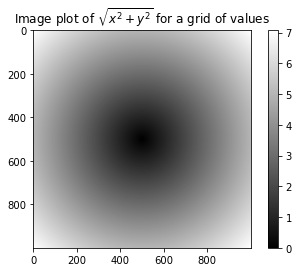

In [163]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [165]:
plt.draw()

<Figure size 432x288 with 0 Axes>

In [168]:
plt.close('all')

### (1) 将逻辑条件作为数组操作

* where 是三元表达式 x if condition  else y的向量化版本

In [169]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [170]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [171]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

where的第二、第三两个参数也可以是标量

In [172]:
arr = np.random.randn(4, 4)
arr

array([[-0.64180169, -1.00999835, -1.05408035, -1.1675648 ],
       [-0.16433831, -1.91250138, -0.54342019,  1.03439525],
       [-0.15467827, -1.45017346,  0.92115009, -0.8749024 ],
       [-0.83030533,  1.01084037,  0.27812391, -0.51824513]])

In [173]:
arr > 0

array([[False, False, False, False],
       [False, False, False,  True],
       [False, False,  True, False],
       [False,  True,  True, False]])

In [ ]:
np.where(arr > 0, 2, -2)

In [ ]:
np.where(arr > 0, 2, arr) # set only positive values to 2

### （2）数学和统计方法

In [174]:
arr = np.random.randn(5000, 5000)
arr

array([[ 0.32172314, -1.13378517, -0.53156773, ..., -0.11240343,
        -0.14741781,  0.5412478 ],
       [-0.45564447, -0.24105952,  0.26418367, ..., -0.17261659,
         0.06616289,  0.64554813],
       [-0.6521709 , -0.86735267, -0.79083501, ...,  0.19539598,
         0.04151892, -1.09437081],
       ...,
       [ 0.63475622,  1.39594421,  0.73893179, ...,  1.17064477,
         1.7764932 ,  0.00825786],
       [-2.61131069, -0.50042578, -0.06141   , ...,  0.47151228,
         0.75271299, -0.93816057],
       [ 0.54139577,  0.07880988, -1.67758356, ..., -0.46819386,
        -0.47848937,  0.21915495]])

In [175]:
arr.mean()

4.877888121310948e-05

In [176]:
arr.std()

1.0002323078012638

In [177]:
np.mean(arr)

4.877888121310948e-05

In [178]:
arr.sum()

1219.472030327737

* 对指定的轴进行统计

In [179]:
arr.mean(axis=1)

array([ 0.00527651,  0.00180241, -0.03871079, ..., -0.01472034,
        0.00068519,  0.00219451])

In [180]:
arr.sum(axis=0)

array([ 16.24146357, -35.05187135,  31.94476942, ...,  81.87782496,
        48.98801366,  28.797294  ])

In [181]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [182]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr
arr.cumsum(axis=0)
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### （3）布尔值数组的方法

In [183]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

50

* any检查是否有一个元素为True
* all检测是否每个元素都为True

In [ ]:
bools = np.array([False, False, True, False])
bools.any()

In [ ]:
bools.all()

### （4）排序

In [184]:
arr = np.random.randn(6)
arr

array([ 1.1957041 ,  0.4920239 , -0.19397376,  0.77182616, -0.35072485,
       -0.03881698])

In [185]:
arr.sort()
arr

array([-0.35072485, -0.19397376, -0.03881698,  0.4920239 ,  0.77182616,
        1.1957041 ])

In [186]:
arr = np.random.randn(5, 3)
arr


array([[ 0.15802543, -0.82898176, -0.34764133],
       [-0.12266962,  0.87827874, -1.21862862],
       [-0.68448707, -0.35885472, -0.79600224],
       [ 1.70611758, -1.9276743 , -1.67327146],
       [ 0.54199065, -1.15068683, -1.0499151 ]])

In [ ]:
arr.sort(1)
arr

In [ ]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr

In [ ]:
large_arr[int(0.05 * len(large_arr))] # 5% quantile

### (5) 唯一值与其他集合逻辑

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)


In [ ]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

使用纯Python的实现：

In [ ]:
sorted(set(names))

* 使用in1d检测一个数组的值是否在另外一个数组中

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

## 5. 使用数组进行文件输入和输出操作

* np.save
* np.load
* 默认情况下使用未压缩格式进行存储，后缀为.npy

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

In [ ]:
np.load('some_array.npy')

* 保存多个数组

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr*2)

In [ ]:
arch = np.load('array_archive.npz')

In [ ]:
arch['a']

In [ ]:
arch['b']

In [ ]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr*3)

In [ ]:
arch_com = np.load('arrays_compressed.npz')

In [ ]:
arch_com['b']

## 6. 线性代数

### (1) 矩阵点乘

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

In [ ]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

In [ ]:
x.dot(y)

等价于：

In [ ]:
np.dot(x, y)

与长度合适的一维数组的点乘

In [ ]:
x2 = np.dot(x, np.ones(3))
x2

In [ ]:
x2.shape

@ 也可以作为点乘

In [ ]:
x @ y

In [ ]:
x @ np.ones(3)

### (2) linalg矩阵分解标准函数集合

In [ ]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
X

In [ ]:
mat = X.T.dot(X)
mat

In [ ]:
inv(mat)

In [ ]:
mat.dot(inv(mat))
q, r = qr(mat)
r

![avatar](linalg1.png)

![avatar](linalg2.png)

![avatar](linalg3.png)

![avatar](linalg4.png)

![avatar](linalg5.png)

## 7. 伪随机数生成

* 使用random.normal生成一个正态分布的样本数组

In [ ]:
samples = np.random.normal(size=(4, 4))
samples

* Python内建的random模块一次只能生成一个值

In [ ]:
from random import normalvariate
N = 1000000
%timeit samples  = [normalvariate(0, 1) for _ in range(N)]
%timeit samples2 = np.random.normal(size=N)

In [ ]:
samples2 = np.random.normal(size=N)

In [ ]:
samples2

设置全局随机种子

In [ ]:
np.random.seed(1234)

使数据独立于其他的随机数状态

In [ ]:
rng = np.random.RandomState(1234)
rng.randn(10)

![avatar](rand.png)

## 实例：随机漫步

In [ ]:
import random
position = 0
walk = [position]
steps = 100000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [ ]:
plt.figure()

In [ ]:
plt.plot(walk[:steps])

In [ ]:
np.random.seed(12345)

In [ ]:
nsteps = 100000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk

In [ ]:
draws

In [ ]:
plt.plot(walk[:nsteps])

In [ ]:
walk.min()
walk.max()

In [ ]:
(np.abs(walk) >= 10).argmax()